<h2 style="color:#ff9600; text-align: justify;">
    Topic: 
    



<h3> Building a Deep Neural Network for Verifing the Age of the customers at self-check-in kiosk's in Supermarkets to comply with regulations and  offering them discounts such as Senior Discounts, Student Discounts and Other promotions based on the events.


<h4 style="color:#9d36eb; text-align: justify;">
    For this module final assessment submission, 
    
    I am imagining myself as a experienced data scientist working at "Lidl" retail-chain-Super Market Company.





**Dataset Url address:  https://susanqq.github.io/UTKFace.**

<h2 style="color:#ff9600; text-align: justify;">
Business Problem Statement: 

Retail Stores throughout  Europe have installed self-check-in machine to streamline the shoping experience and improve efficiency, with regulatory requirements, they have to ensure age-restricted products are not sold to minors. Failure of these can serios damages to the reputation and have to face leagal consequences. Traditional age verification are relying on manual document checks by store representatives, which can be contratory to concept of self check in machines, also time-consuming, and susceptible to fraud.

The parent chain company seeking for implementing, automated age verification system. In addition to that company also provides discount such as Senior Discounts, Student Discounts and Other promotions based on the events. The age verification system will utilize machine learning to analyze consumer facial images and accurately verify their age in real time. 

<h2 style="color:#ff9600; text-align: justify;">
Machine Learning Task:

This is a supervised learning task. where it will be trained on labled data. 

For age detection- **It will be Regression Task**,


For offering discounts- It will be Image classification task 



<h3  style="color:#d14b36; text-align: justify;">
    Step1: Importing the required Libraries

In [12]:
import warnings
warnings.filterwarnings("ignore")


import os
import cv2 as OpenCV
import numpy as npy
import pandas as pnd
import matplotlib.pyplot as mplt
from tqdm import tqdm

# TensorFlow and Keras
import tensorflow as Tenflo
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers

# Scikit-Learn
from sklearn.preprocessing import StandardScaler

2024-12-14 05:41:10.462837: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h3  style="color:#d14b36; text-align: justify;"> Step2: Loading the data and Preprocessing</h3>

In this section, I am explaining the preprocessing steps, that i have taken to prepare my UTK Face dataset for the purpose of this project in this notebook.



<h4 style="color:#BFFF00;">a: Downloading the original dataset</h4>

The orginal images were downloaded from the website -- >  https://susanqq.github.io/UTKFace/ and  there were **23991** image files. Orginally the images name were in the format "AGE_GENDER_ETHNICITY_TIMESTAMP" in the JPEG / JPG format. AGE was represented by real number from 0 - 116. GENDER was represented by Binary value 0 for Male and 1 for Female. 


In [15]:
path_UTK_face_dataset = "/Users/lohithbasavanahallianjinappa/Downloads/UTK_Face_Dataset"
my_dataset_files = [f for f in os.listdir(path_UTK_face_dataset) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
print("Total no of files: " + str(len(my_dataset_files)))


Total no of files: 23991


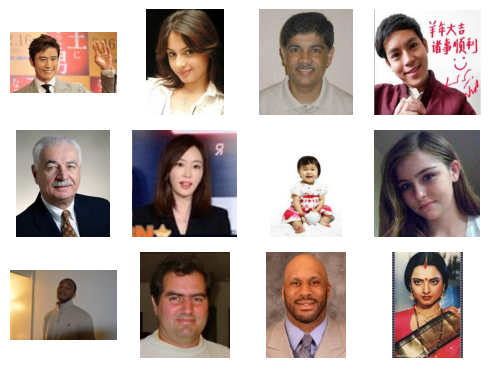

In [16]:
no_images_to_display = 12
my_random_index_number = npy.random.choice(len(my_dataset_files), no_images_to_display, replace=False)
selected_image_files = [my_dataset_files[i] for i in my_random_index_number]
my_individual_file_path = [os.path.join(path_UTK_face_dataset, file_name) for file_name in selected_image_files]

grid_size = int(len(my_individual_file_path) ** 0.5) + 1
mplt.figure(figsize=(5, 5))

for i, j in enumerate(my_individual_file_path, 1):
    mplt_image_var = mplt.imread(j)
    mplt.subplot(grid_size, grid_size, i)
    mplt.imshow(mplt_image_var)
    mplt.axis("off")
mplt.tight_layout()
mplt.show()

<h4 style="color:#BFFF00;">b: Key information extraction and image conversion</h4>

After Downloading and loading the images, The image files was checked with non supported format and removed them. And i wanted to extract the key information and convert the images into pixels, so i have defined two functions respectively to extract AGE and GENDER, and convert it to normalized pixels array by dividing it by 255 and resizing it to 64 X 64 size with the help of OPENCV Module for the suitable runtime my envirnoment. Then those data were stored in pandas dataframe for further processing.  

In [18]:
#Function to extract the age and gender from the name of the file
def key_info_extraction(name_of_the_file):
    file_name_split = name_of_the_file.split("_")
    var_age_in_yrs = int(file_name_split[0])
    var_gender = int(file_name_split[1])
    return var_age_in_yrs, var_gender

In [19]:
#Function to convert image to pixels using OpenCV module and Normalizing it by dividing 255
def image_pixel_converter(name_of_the_file):

    var_read_image = OpenCV.imread(name_of_the_file)
    var_image_pixels = OpenCV.cvtColor(var_read_image, OpenCV.COLOR_BGR2RGB)
    var_image_pixels = OpenCV.resize(var_image_pixels, (64, 64)) / 255
    var_image_pixels = npy.array(var_image_pixels)
    return var_image_pixels

In [20]:
#Calling both function key_info_extraction and image_pixel_converter for each image file using for-loop
index_data_list = []
file_data_list = []
age_data_list = []
gender_data_list = []
image_pixel_data_list = []
for i, name in enumerate(tqdm(my_dataset_files, desc="Processing Images")):
  
    image_file_path = os.path.join(path_UTK_face_dataset, name)
    var_age, var_gender = key_info_extraction(name)
    var_index = "Img-" + str(i)
    var_pixels = image_pixel_converter(image_file_path)

    index_data_list.append(var_index)
    file_data_list.append(image_file_path)
    age_data_list.append(var_age)
    gender_data_list.append(var_gender)
    image_pixel_data_list.append(var_pixels)

#Creating the dataframe.
my_tabular_data_frame = pnd.DataFrame()
my_tabular_data_frame["Index"] = index_data_list
my_tabular_data_frame["Path"] = file_data_list
my_tabular_data_frame["Age"] = age_data_list
my_tabular_data_frame["Gender"] = gender_data_list
my_tabular_data_frame["Image_Pixel"] = image_pixel_data_list
print(my_tabular_data_frame.shape)
my_tabular_data_frame.head(5)

Processing Images: 100%|█████████████████| 23991/23991 [01:36<00:00, 248.25it/s]


(23991, 5)


,Index,Path,Age,Gender,Image_Pixel
0,Img-0,/Users/lohithbasavanahallianjinappa/Downloads/...,26,0,"[[[0.08627450980392157, 0.09019607843137255, 0..."
1,Img-1,/Users/lohithbasavanahallianjinappa/Downloads/...,27,0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,Img-2,/Users/lohithbasavanahallianjinappa/Downloads/...,16,1,"[[[0.17647058823529413, 0.1607843137254902, 0...."
3,Img-3,/Users/lohithbasavanahallianjinappa/Downloads/...,40,1,"[[[0.10980392156862745, 0.1411764705882353, 0...."
4,Img-4,/Users/lohithbasavanahallianjinappa/Downloads/...,40,0,"[[[0.011764705882352941, 0.0, 0.0], [0.8980392..."


<h4 style="color:#BFFF00;">c: Image data categorization according to the age</h4>

The data was checked with null values, there were none, then the ages were categorised in to 5 groups and featured into new column called Age category, this was necessary in the business problem context as well to verify the data biasness.


    
| Category  | Age  | Description |
|-----------|-----------|-----------|
| 0     | 0-12   | Infants & Children   |
| 1     | 13-17   | Teenagers   |
| 2     | 18-34   | University Students and Young Adult Professionals   |
| 3     | 35-64   | Adults   |
| 4     | 65+   | Senior  |

In [23]:
#Categorizing the images with respect to age feature

def age_categorization(parm_age):
    if parm_age <= 12:
        return 0 # 0 for -- > Infants & Children
    elif 13 <= parm_age <= 17:
        return 1 # 1 for -- > Teenagers
    elif 18 <= parm_age <= 34:
        return 2 # 2 for -- > University Students and Young Adult Professionals
    elif 35 <= parm_age <= 64:
        return 3 # 3 for -- > Adults
    else:
        return 4 #"Senior"

my_tabular_data_frame["Age_Category"] = my_tabular_data_frame["Age"].apply(age_categorization)
print("\n" + str(my_tabular_data_frame["Age_Category"].value_counts()))

#Checking for null values
print("\nNo of Null Values in each column: \n\n" + str(my_tabular_data_frame.isnull().sum()))



Age_Category
2    10018
3     7508
0     3671
4     1970
1      824
Name: count, dtype: int64

No of Null Values in each column: 

Index           0
Path            0
Age             0
Gender          0
Image_Pixel     0
Age_Category    0
dtype: int64


<h4 style="color:#BFFF00;">d: EDA of the orginal data</h4>

The below code will show us the age distribution, gender distribution of the dataset.

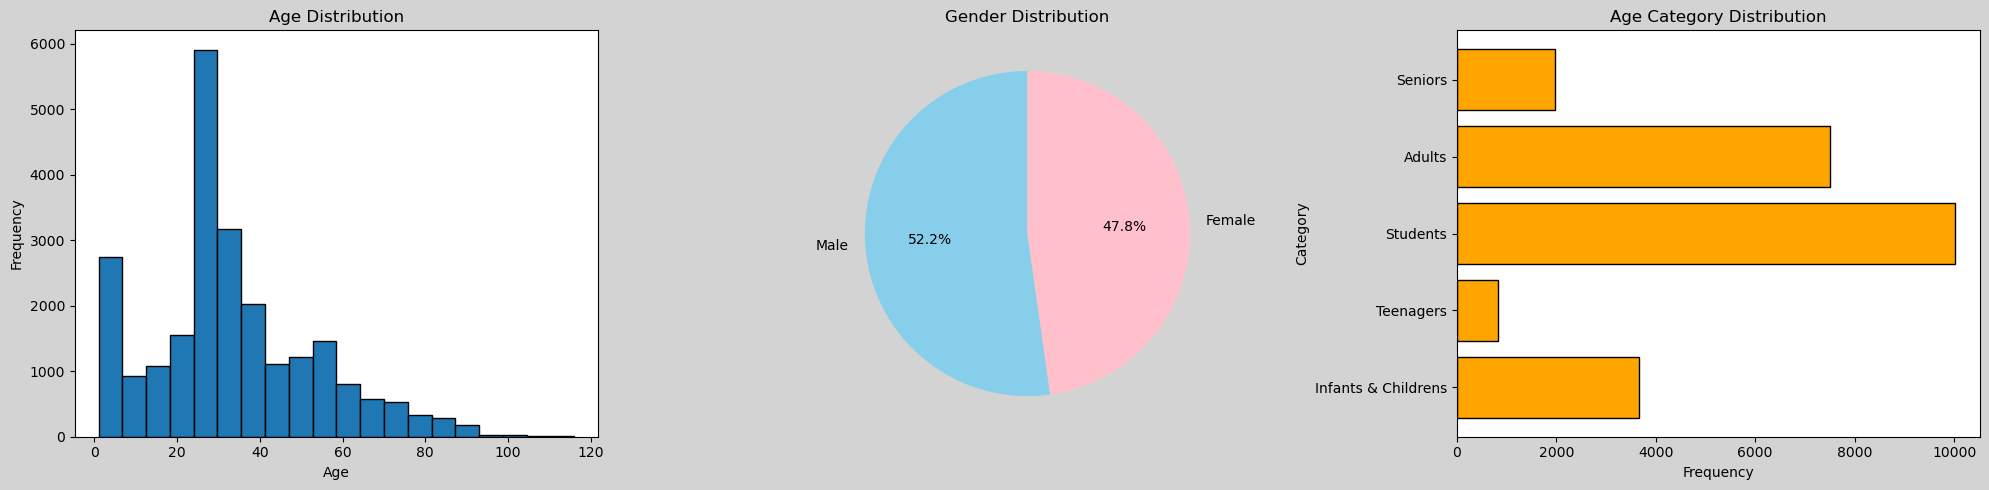

In [25]:
fig, axes = mplt.subplots(1, 3, figsize=(20, 5))
fig.patch.set_facecolor("#D3D3D3")

axes[0].hist(my_tabular_data_frame["Age"], bins=20, edgecolor="k")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

counts = my_tabular_data_frame["Gender"].value_counts()
labels = ["Male", "Female"]
axes[1].pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["skyblue", "pink"])
axes[1].set_title("Gender Distribution")


axes[2].barh(my_tabular_data_frame["Age_Category"].value_counts().index, 
         my_tabular_data_frame["Age_Category"].value_counts().values, 
         color="orange", edgecolor="k")

axes[2].set_title("Age Category Distribution")
axes[2].set_xlabel("Frequency")
axes[2].set_ylabel("Category")
bargraph_categories = ["Infants & Childrens", "Teenagers", "Students", "Adults", "Seniors"]
axes[2].set_yticks(range(len(bargraph_categories)), bargraph_categories)

mplt.tight_layout()
mplt.show()

<h4 style="color:#BFFF00;">e: Dealing with under represented age group</h4>

It was observed that age categories data were imbalanced and will cause bias to particular category during training, it was necessary to maintain equal balance. The count of few category was important, as the goal is age verification. Needed more data from such categories. 
To tackel this, i have done data augmentation using "TENSOR FLOW - ImageDataGenerator" for generating the under-represented  samples. 

In [27]:
#Data Augmentation for under represented category
my_image_aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)
var_img_aug = []
var_img_aug_index = []
var_img_aug_age = []
var_img_aug_gender = []
var_img_aug_age_cat = []

var_target = {var_category: 10018 for var_category in my_tabular_data_frame["Age_Category"].unique()}
var_before_aug_counts = my_tabular_data_frame["Age_Category"].value_counts().to_dict()
for i, count in tqdm(var_before_aug_counts.items(), desc="Processing Images"):
    var_targets = var_target[i]
    no_of_aug = var_targets - count

    if no_of_aug <= 0:
        continue  
    age_cat_index = my_tabular_data_frame[my_tabular_data_frame["Age_Category"] == i].index

    for idx in age_cat_index:
        try:
            aug_image = npy.array(my_tabular_data_frame.loc[idx, "Image_Pixel"])
            aug_image = npy.expand_dims(aug_image, axis=0)

            var_aug_age = my_tabular_data_frame.loc[idx, "Age"]
            var_aug_gender = my_tabular_data_frame.loc[idx, "Gender"]
            var_aug_age_category = my_tabular_data_frame.loc[idx, "Age_Category"]
            var_aug_sample_base = my_tabular_data_frame.loc[idx, "Index"]

            generated_image_count = 0
            for batch in my_image_aug.flow(aug_image, batch_size=32):
                var_img_aug.append(batch[0]) 
                var_img_aug_index.append(f"{var_aug_sample_base}/Aug-{generated_image_count + 1}")
                var_img_aug_age.append(var_aug_age)
                var_img_aug_gender.append(var_aug_gender)
                var_img_aug_age_cat.append(var_aug_age_category)

                generated_image_count += 1
                if generated_image_count >= no_of_aug:
                    break  

            if len(var_img_aug) >= no_of_aug:
                break 

        except Exception as e:
            print(f"Error {idx}: {e}")

image_aug_df = pnd.DataFrame({
    "Index": var_img_aug_index,
    "Age": var_img_aug_age,
    "Gender": var_img_aug_gender,
    "Image_Pixel": [npy.array(img) / 255 for img in var_img_aug], 
    "Age_Category": var_img_aug_age_cat
})



Processing Images: 100%|██████████████████████████| 5/5 [00:38<00:00,  7.78s/it]


The below code will conncate the augmented data with orginal dataset to balance the datasets.

In [28]:
# Concating both data frame
my_sample_tabular_data_frame = pnd.concat([my_tabular_data_frame, image_aug_df], ignore_index=True)

print("\n Size of the dataset: ")
print(my_sample_tabular_data_frame.shape)

print("\n After Augmentation Age Category Value Counts: ")
print(my_sample_tabular_data_frame["Age_Category"].value_counts())

my_sample_tabular_data_frame.tail(5)


 Size of the dataset: 
(50090, 6)

 After Augmentation Age Category Value Counts: 
Age_Category
2    10018
1    10018
3    10018
4    10018
0    10018
Name: count, dtype: int64


,Index,Path,Age,Gender,Image_Pixel,Age_Category
50085,Img-2/Aug-9190,NaN,16,1,"[[[0.0005280627, 0.0005280627, 0.0005280627], ...",1
50086,Img-2/Aug-9191,NaN,16,1,"[[[0.0011257369, 0.0006354575, 0.0005056581], ...",1
50087,Img-2/Aug-9192,NaN,16,1,"[[[0.0014074232, 0.00075045525, 0.00055484835]...",1
50088,Img-2/Aug-9193,NaN,16,1,"[[[0.0007987361, 0.0005224933, 0.0004911621], ...",1
50089,Img-2/Aug-9194,NaN,16,1,"[[[0.0011533288, 0.00059578946, 0.0005365477],...",1


<h3  style="color:#d14b36; text-align: justify;"> Step3: Data Normalization and splitting the dataset</h3>

<h4 style="color:#BFFF00;"> a: Data Normalization and Vectorization</h4>

The pixels values are already normalised when we converting it. In the below cell i will normalize the age values using standard scaler. And also vectorize the features and targets.

In [31]:
#Normalization
age_scalar_var = StandardScaler()
my_sample_tabular_data_frame["Age"] = age_scalar_var.fit_transform(my_sample_tabular_data_frame[["Age"]])

#Vectorising the columns
vect_var_age = npy.array(my_sample_tabular_data_frame["Age"],dtype=npy.float32)
vect_var_pixel = npy.array(my_sample_tabular_data_frame["Image_Pixel"].tolist(), dtype=npy.float32).reshape(-1, 64, 64, 3)
vect_var_gender = npy.array(my_sample_tabular_data_frame["Gender"],dtype=npy.float32).reshape(-1, 1)
vect_var_age_category = npy.array(my_sample_tabular_data_frame["Age_Category"],dtype=npy.int32)

<h4 style="color:#BFFF00;"> b: Splitting the dataset</h4>

Befor splitting the dataset i will shuffel the dataset using Tensor Flow, then i will define my desired splitting metrics and i use tensor flow to split the dataset base on that metrics. Then, later i have defined the batchsize for managing the data processing during model training.

As I am doing both multiclass classification and regression task, my input features are "Image_pixel" and "Gender". The target for classification task is "Age_category" where as for regression "Age"

In [34]:
# creating Tensor Flow datasent and shuffling
Tf_main_data = Tenflo.data.Dataset.from_tensor_slices((

    {"image_converted_pixel_input": vect_var_pixel, "scalar_gender_input": vect_var_gender},
    {"classification_output_age_category": vect_var_age_category,"regression_output_age": vect_var_age}, 

))

Tf_main_data = Tf_main_data.shuffle(buffer_size=len(vect_var_pixel), seed=42)
print("Tensorflow dataset size: " + str(Tenflo.data.experimental.cardinality(Tf_main_data).numpy()))

Tensorflow dataset size: 50090


In the above cell, I am loading my data into tensorflow dataset and shuffleing them to randomly split thhe dataset, Next i am specifing my desired dataset size, 80%, 10% and 10% of data for Training, Validiting and Training respectively.  Using Tensor flow take and skip functions for splitting the data set and and i will specify batch size and prefetch in the below cells.

In [35]:
#spliting (80-10-10) and batching the data set
size_of_data = len(my_sample_tabular_data_frame)
size_of_train_data = int(0.8 * size_of_data)
size_of_validate_data = int(0.1 * size_of_data)


Tf_training_data = Tf_main_data.take(size_of_train_data)
Tf_training_data = Tf_training_data.take(size_of_train_data)
size_of_remaining_data = Tf_main_data.skip(size_of_train_data)
Tf_validation_data = size_of_remaining_data.take(size_of_validate_data)
Tf_testing_data = size_of_remaining_data.skip(size_of_validate_data)
print("Tensorflow Training_dataset size: " + str(Tenflo.data.experimental.cardinality(Tf_training_data).numpy()))
print("Tensorflow Validation_dataset size: " + str(Tenflo.data.experimental.cardinality(Tf_validation_data).numpy()))
print("Tensorflow Test_dataset size: " + str(Tenflo.data.experimental.cardinality(Tf_testing_data).numpy()))

Tensorflow Training_dataset size: 40072
Tensorflow Validation_dataset size: 5009
Tensorflow Test_dataset size: 5009


In [36]:
# Batch and prefetch
Tenflo_batch_size = 32
Tf_training_data = Tf_training_data.batch(Tenflo_batch_size).prefetch(Tenflo.data.AUTOTUNE)
Tf_validation_data = Tf_validation_data.batch(Tenflo_batch_size).prefetch(Tenflo.data.AUTOTUNE)
Tf_testing_data = Tf_testing_data.batch(Tenflo_batch_size).prefetch(Tenflo.data.AUTOTUNE)

<h3  style="color:#d14b36; text-align: justify;"> Step4: Model Building and Training</h3>

<h4 style="color:#BFFF00;"> a: Model_Building</h4>

The below found Multi-Task Deep Neural model architecture is the best performing model that i have fine tuned, which is designed for perfoming both classification task ( Age_Category Detection) and regression task (age prediction and verification). 

**Model Design**

This multi-task model uses shared backbone convolutional neural network(CNN).

For CNN, the inputs are the image pixel values with the shape 64 x 64 x 3 RGB. CNN consists of two convolutional and max pooling layers the inputs for both max pooling layers are batch normalized, then it have one flattened dense layer with 60% dropout. The output of clasification task is using softmax activation, regression is using linear, rest of all layers are using reLu activation function. I have also defined Learning rate and early stopping for beter optimization of the model.


In [39]:
#Model_architecture
model_input_pixels = Input(shape=(64, 64, 3), name="image_converted_pixel_input")
model_input_gender = Input(shape=(1,), name="scalar_gender_input")

shared_cnn_model_layer_1 = Conv2D(32, (3, 3), activation="relu")(model_input_pixels)
shared_cnn_model_layer_1 = BatchNormalization()(shared_cnn_model_layer_1)
shared_cnn_model_layer_1 = MaxPooling2D((2, 2))(shared_cnn_model_layer_1)

shared_cnn_model_layer_2 = Conv2D(64, (3, 3), activation="relu")(shared_cnn_model_layer_1)
shared_cnn_model_layer_2 = BatchNormalization()(shared_cnn_model_layer_2)
shared_cnn_model_layer_2 = MaxPooling2D((2, 2))(shared_cnn_model_layer_2)

shared_cnn_model_layer_3 = Flatten()(shared_cnn_model_layer_2)
shared_cnn_model_layer_3 = Dense(256, activation="relu")(shared_cnn_model_layer_3)
shared_cnn_model_layer_3 = Dropout(0.6)(shared_cnn_model_layer_3)



model_input_gender_layer = Dense(32, activation="relu",kernel_regularizer=l2(0.01))(model_input_gender)
model_input_gender_layer = Dropout(0.5)(model_input_gender_layer)



cnn_and_gender_concatenated_layer = layers.Concatenate()([
                                                            shared_cnn_model_layer_3, 
                                                            model_input_gender_layer
                                                        ])

#Classification Output
clasification_target_age_category_layer = Dense(5, activation="softmax", name="classification_output_age_category")(cnn_and_gender_concatenated_layer)

cnn_gender_and_predicated_age_category_concatenated_layer = layers.Concatenate()([
                                                                                    shared_cnn_model_layer_3, 
                                                                                    cnn_and_gender_concatenated_layer, 
                                                                                    clasification_target_age_category_layer
                                                                                ])

#Regression Output
regression_target_age_layer = layers.Dense(1, activation=None,kernel_regularizer=l2(0.01), name="regression_output_age")(cnn_gender_and_predicated_age_category_concatenated_layer)




model_learning_rate_controller = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=1,
    verbose=1,
    min_lr=1e-6
)

model_early_stopper = Tenflo.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)


#Model_build
age_multi_task_model = Model(
    inputs={"image_converted_pixel_input": model_input_pixels, "scalar_gender_input": model_input_gender},
    outputs={"classification_output_age_category": clasification_target_age_category_layer, "regression_output_age": regression_target_age_layer}
)
age_multi_task_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_converted_pi… │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 62, 62,    │        896 │ image_converted_… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 62, 62,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 29, 29,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 29,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 12544)     │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scalar_gender_input │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  3,211,520 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │         64 │ scalar_gender_in… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 288)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification_out… │ (None, 5)         │      1,445 │ concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 549)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ concatenate[0][0… │
│                     │                   │            │ classification_o… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression_output_… │ (None, 1)         │        550 │ concatenate_1[0]… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,233,355 (12.33 MB)

 Trainable params: 3,233,163 (12.33 MB)

 Non-trainable params: 192 (768.00 B)

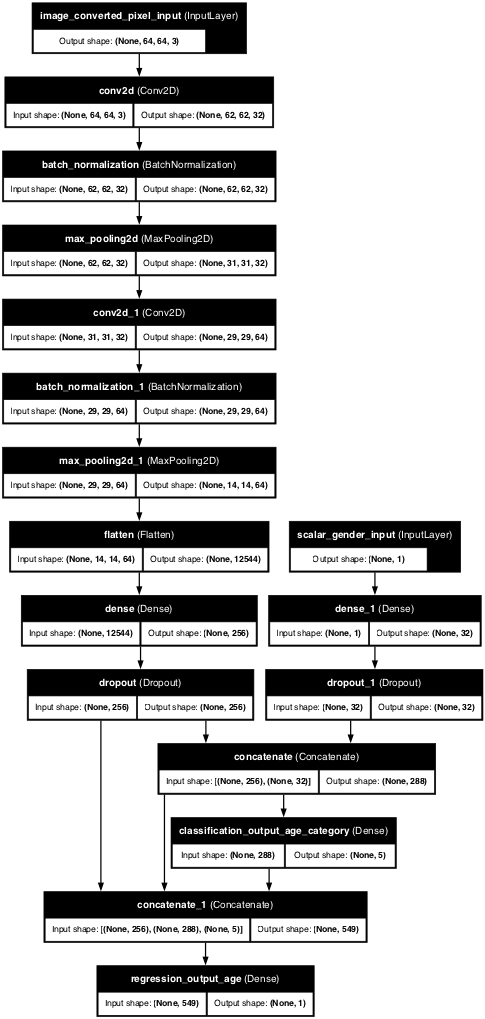

In [40]:
plot_model(
    age_multi_task_model,
    to_file="age_multi_task_model_plot.png",  
    show_shapes=True,         
    show_layer_names=True,    
    dpi=45,          
)

<h4 style="color:#BFFF00;"> b:Model_Compilation</h4>

After the model was designed, i compiled it with adam optimizer and 0.001learning rate, loss weights with 1 for classification and 0.5 for regression. Mean absolute error and accuracy are used as metrics for regression and classification respectively. Sparse Categorical Crossentropy is been used insted of Categorical Crossentropy as i have not done one hot coding.

In [42]:
age_multi_task_model_optimizer = Adam(learning_rate=0.001)

age_multi_task_model.compile(
    
    optimizer=age_multi_task_model_optimizer,
    
    loss={
        "classification_output_age_category": "sparse_categorical_crossentropy",
        "regression_output_age": "mae"
    },
    
    loss_weights={
        "classification_output_age_category": 1.0,
        "regression_output_age": 0.5
    },
    
    metrics={
        "classification_output_age_category": "accuracy",
        "regression_output_age": "mae"
    }
)


<h4 style="color:#BFFF00;"> c:Model_Training</h4>

After the model was compiled, it was trained with traning dataset and validated with validation dataset. I am running 50 epoch. 

In [44]:
age_multi_task_model_history = age_multi_task_model.fit(
    Tf_training_data,
    validation_data=Tf_validation_data,
    epochs=50,
    batch_size=32,
    callbacks=[model_early_stopper, model_learning_rate_controller],
)

Epoch 1/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 234s 180ms/step - classification_output_age_category_accuracy: 0.6089 - classification_output_age_category_loss: 1.9044 - loss: 2.5330 - regression_output_age_loss: 0.6051 - regression_output_age_mae: 1.2103 - val_classification_output_age_category_accuracy: 0.7546 - val_classification_output_age_category_loss: 0.5768 - val_loss: 0.7568 - val_regression_output_age_loss: 0.1654 - val_regression_output_age_mae: 0.3313 - learning_rate: 0.0010
Epoch 2/50
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - classification_output_age_category_accuracy: 0.7366 - classification_output_age_category_loss: 0.6232 - loss: 0.8471 - regression_output_age_loss: 0.2106 - regression_output_age_mae: 0.4213
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 225s 180ms/step - classification_output_age_category_accuracy: 0.7366 - classification_output_age_category_loss: 0.6232 - loss: 0.8471 - regression_output_age_

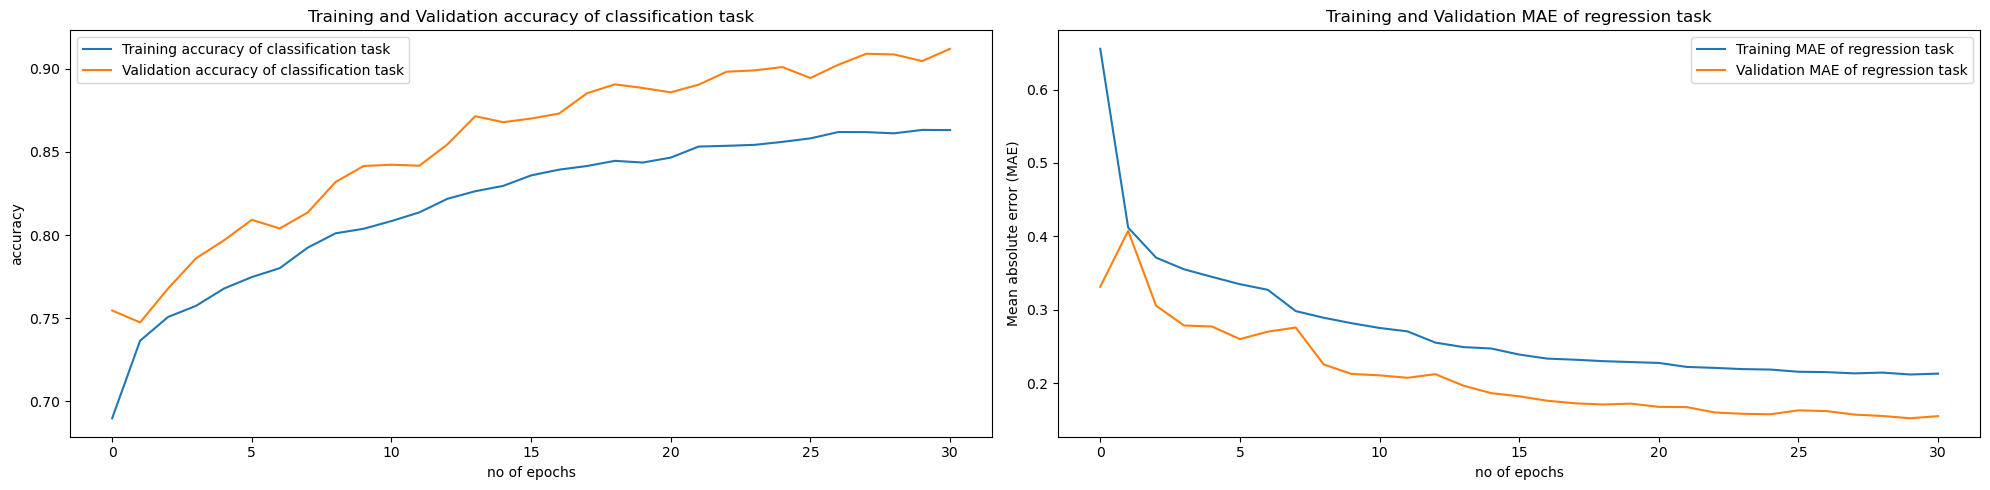

In [85]:
fig, axes = mplt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(age_multi_task_model_history.history["classification_output_age_category_accuracy"], label="Training accuracy of classification task")
axes[0].plot(age_multi_task_model_history.history["val_classification_output_age_category_accuracy"], label="Validation accuracy of classification task")
axes[0].set_xlabel("no of epochs")
axes[0].set_ylabel("accuracy")
axes[0].set_title("Training and Validation accuracy of classification task")
axes[0].legend()

axes[1].plot(age_multi_task_model_history.history["regression_output_age_mae"], label="Training MAE of regression task")
axes[1].plot(age_multi_task_model_history.history["val_regression_output_age_mae"], label="Validation MAE of regression task")
axes[1].set_xlabel("no of epochs")
axes[1].set_ylabel("Mean absolute error (MAE)")
axes[1].set_title("Training and Validation MAE of regression task")
axes[1].legend()

mplt.tight_layout()
mplt.show()

<h3  style="color:#d14b36; text-align: justify;"> Step5: Model Evaluation</h3>

Then the model was evaluated with unseen test data, and the model performed well with **high classification accuracy and good regression performance with balanced lossess**

In [87]:
model_evaluation_with_test_data = age_multi_task_model.evaluate(Tf_testing_data, verbose=1)

overall_model_loss = model_evaluation_with_test_data[0]
clasification_task_loss = model_evaluation_with_test_data[1]
regression_task_loss = model_evaluation_with_test_data[2]
clasification_task_accuracy = model_evaluation_with_test_data[3]
regression_task_mae = model_evaluation_with_test_data[4]

print("\n")
print(f"Test_set_classification_task_accuracy: {clasification_task_accuracy:.4f}")
print(f"Test_set_regression_task_MAE: {regression_task_mae:.4f}")
print("\n")
print(f"Test_set_classification_task_loss: {clasification_task_loss:.4f}")
print(f"Test_set_regression_task_loss: {regression_task_loss:.4f}")
print("\n")
print(f"Test_set_total_loss: {overall_model_loss:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - classification_output_age_category_accuracy: 0.8971 - classification_output_age_category_loss: 0.2688 - loss: 0.3644 - regression_output_age_loss: 0.0799 - regression_output_age_mae: 0.1598


Test_set_classification_task_accuracy: 0.9048
Test_set_regression_task_MAE: 0.1538


Test_set_classification_task_loss: 0.2604
Test_set_regression_task_loss: 0.0770


Test_set_total_loss: 0.3531


<h2 style="color:#ff9600; text-align: justify;">
Experiment with the model

In this section, i will be displaying a table with the deatils and configuration of experiments i have executed with model to justify the above model is the best model i have fine tuned. For the expirement with the models i have trained the model with only 8014 data and validated with 1001 datas and i ran each expirements 20 epoch due to training time and processing speed constraints.

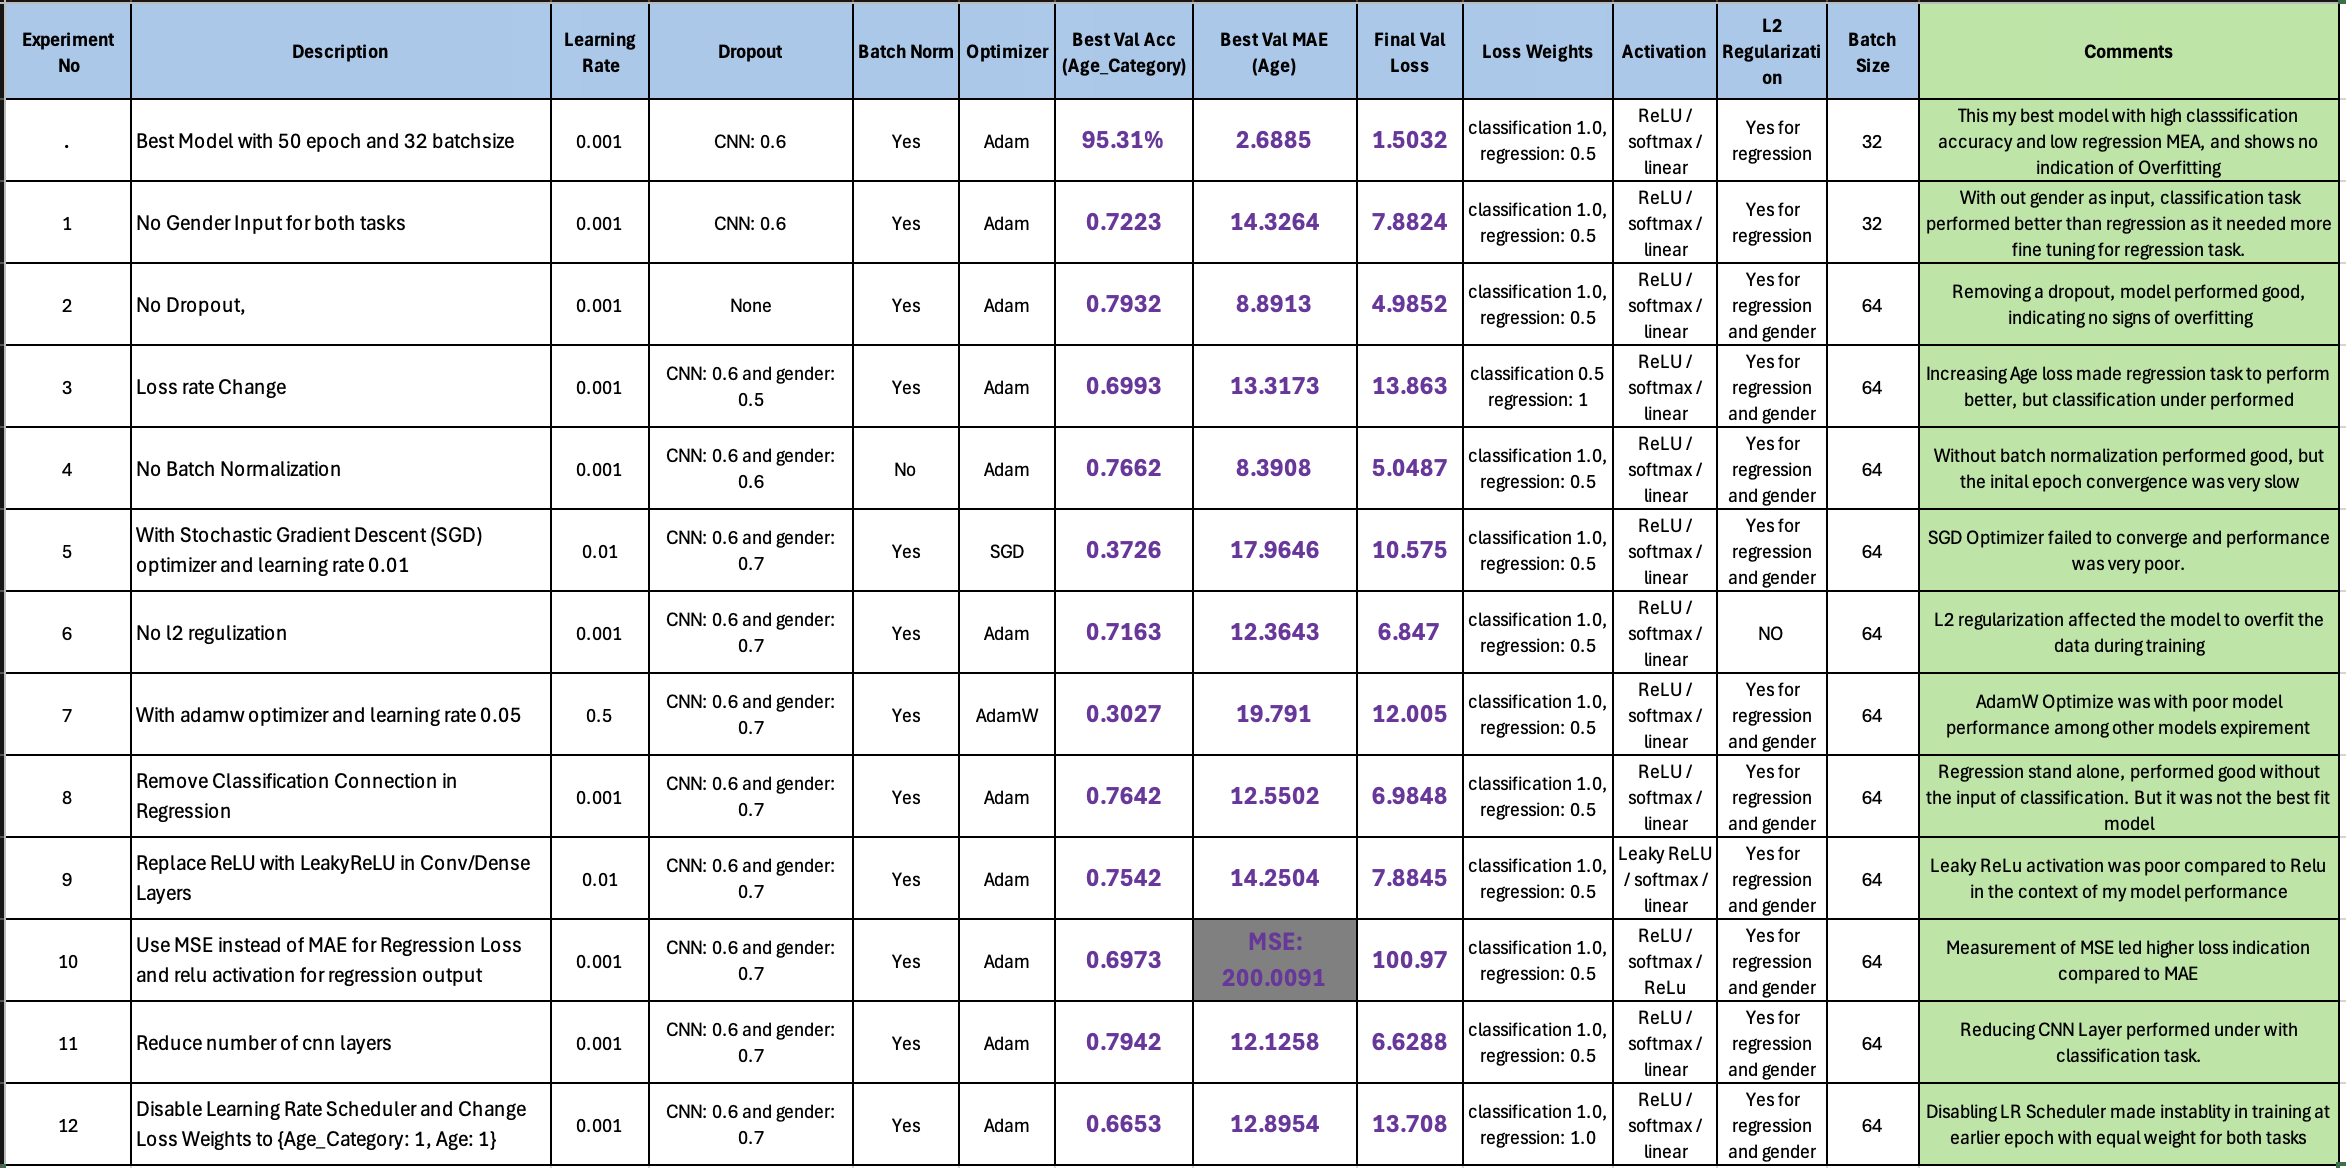

In [2]:

from IPython.display import Image, display
display(Image(filename="../../Main/M507A Methods of Prediction/EXP_Table.png"))


<h2 style="color:#ff9600; text-align: justify;">
Conclusion

To conclude, i strongly belive that the proposed solution to adopt multi-task neural network's pipeline designed above will address the  business problem of age verification and discout offering for Lidal Chain super market company. This model is able to process large set of image datas in efficient manner, reffereing to model evalution, it performed really well with the accuracy which makes it to adopt to diffrent business scenarios. By training this model with more variety and diverse data set, model has performed exceptionally well. However there some challenges also, one is Task balancing concern: Balancing or Optimizing both classification and regression model is a difficult task. Data dependency: As the model is trained and relied on the quality and quantity of the available dataset., Computational constraints: Model involves Deep Neural Network and its was hard to trair on CPU, Hence It requires GPU for speeding our model training and for performing well and Complexity: The Network is multi-task complex network, it might pose some challenges like hyperparameter tuning and minimizing the loss of any one tasks.